In [0]:
#Download master repository
#!!wget https://github.com/Cheshirelul/introduccion-RedesNeuronales/archive/master.zip
#!unzip master.zip

## Import database

In [1]:
!!wget --no-check-certificate http://www.sandradelafuente.com/app/download/15278429/dog.zip
!!wget --no-check-certificate http://www.sandradelafuente.com/app/download/15279816/cat.zip

['--2020-02-13 18:55:06--  http://www.sandradelafuente.com/app/download/15279816/cat.zip',
 'Resolving www.sandradelafuente.com (www.sandradelafuente.com)... 74.208.215.110, 2607:f1c0:1000:6106:d855:c503:cf73:1830',
 'Connecting to www.sandradelafuente.com (www.sandradelafuente.com)|74.208.215.110|:80... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: unspecified [application/zip]',
 'Saving to: ‘cat.zip’',
 '',
 '',
 'cat.zip                 [<=>                 ]       0  --.-KB/s               ',
 'cat.zip                 [ <=>                ]  15.14K  72.2KB/s               ',
 'cat.zip                 [  <=>               ]  43.40K   103KB/s               ',
 'cat.zip                 [   <=>              ]  94.28K   151KB/s               ',
 'cat.zip                 [    <=>             ] 184.48K   222KB/s               ',
 'cat.zip                 [     <=>            ] 352.93K   343KB/s               ',
 'cat.zip                 [      <=>           ] 

In [2]:
!unzip dog.zip
!unzip cat.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog/dog.370.jpg         
  inflating: dog/dog.3700.jpg        
  inflating: dog/dog.3701.jpg        
  inflating: dog/dog.3702.jpg        
  inflating: dog/dog.3703.jpg        
  inflating: dog/dog.3704.jpg        
  inflating: dog/dog.3705.jpg        
  inflating: dog/dog.3706.jpg        
  inflating: dog/dog.3707.jpg        
  inflating: dog/dog.3708.jpg        
  inflating: dog/dog.3709.jpg        
  inflating: dog/dog.371.jpg         
  inflating: dog/dog.3710.jpg        
  inflating: dog/dog.3711.jpg        
  inflating: dog/dog.3712.jpg        
  inflating: dog/dog.3713.jpg        
  inflating: dog/dog.3714.jpg        
  inflating: dog/dog.3715.jpg        
  inflating: dog/dog.3716.jpg        
  inflating: dog/dog.3717.jpg        
  inflating: dog/dog.3718.jpg        
  inflating: dog/dog.3719.jpg        
  inflating: dog/dog.372.jpg         
  inflating: dog/dog.3720.jpg        
  inflating: dog/dog.3721.jpg        

In [0]:
import json #create the json
import shutil #copy images to train, test and valid dirs
import os #files and dirs manipulation
import math #split calculate

In [0]:
#create training,validation,testing directories
data_set_dirs= ['train','valid','test']
for dsdirs in data_set_dirs:
  path = '/content/' + dsdirs
  os.mkdir( path,755 )

In [0]:
#define proportion of data
train_prop = 0.6
valid_prop = test_prop = (1-train_prop)/2

#CATS
#function to split data of each category into trainning, validation and testing set
def create_dataset_cats():
  for ii,cat in enumerate(category_list):    
    src_path = parent_dir + 'cat/'
    dest_dir1 = parent_dir+'train/cat/' #str(ii)
    dest_dir2 = parent_dir+'valid/cat/'#str(ii)
    dest_dir3 = parent_dir+'test/cat/'#str(ii)
    
    dest_dirs_list = [dest_dir1,dest_dir2,dest_dir3]
    for dirs in dest_dirs_list:
      os.mkdir(dirs,755 )
    
    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    
    #get training, testing and validation files count
    train_count = math.ceil(train_prop*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count
    
    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count]
    valid_data_list = files[train_count+1:train_count+1+valid_count]  
    test_data_list =  files[train_count+valid_count:]
       
  
    for train_data in train_data_list:
      train_path = src_path + train_data
      shutil.copy(train_path,dest_dir1)
    
    for valid_data in valid_data_list:
      valid_path = src_path + valid_data
      shutil.copy(valid_path,dest_dir2)
    
    for test_data in test_data_list:
      test_path = src_path + test_data
      shutil.copy(test_path,dest_dir3)

#DOGS
#function to split data of each category into trainning, validation and testing set
def create_dataset_dogs():
  for ii,cat in enumerate(category_list):    
    src_path = parent_dir + 'dog/'
    dest_dir1 = parent_dir+'train/dog/' #str(ii)
    dest_dir2 = parent_dir+'valid/dog/'#str(ii)
    dest_dir3 = parent_dir+'test/dog/'#str(ii)
    
    dest_dirs_list = [dest_dir1,dest_dir2,dest_dir3]
    for dirs in dest_dirs_list:
      os.mkdir(dirs,755 )
    
    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    
    #get training, testing and validation files count
    train_count = math.ceil(train_prop*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count
    
    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count]
    valid_data_list = files[train_count+1:train_count+1+valid_count]  
    test_data_list =  files[train_count+valid_count:]
       
  
    for train_data in train_data_list:
      train_path = src_path + train_data
      shutil.copy(train_path,dest_dir1)
    
    for valid_data in valid_data_list:
      valid_path = src_path + valid_data
      shutil.copy(valid_path,dest_dir2)
    
    for test_data in test_data_list:
      test_path = src_path + test_data
      shutil.copy(test_path,dest_dir3)

In [6]:
#path configuration
parent_dir = '/content/'
#get category folder list
os.chdir(parent_dir)
category_list = list(filter(lambda x: os.path.isdir(x), os.listdir()))
for category in category_list:
  print(category)

.config
cat
dog
valid
train
test
sample_data


In [0]:
#save category data as dictionary in a json file
cat_data = {}

for ix,cat in enumerate(category_list):
  cat_data[ix] = cat
with open('/content/cat_dogs.json', 'w') as outfile:  
    json.dump(cat_data , outfile)

In [0]:
#Save cats and dogs images in train, test and validation folder:
#create_dataset_cats()
#create_dataset_dogs()

## Images exhibition and array generator

In [0]:
# define location of dataset
import sys, os
import numpy as np
import matplotlib.pyplot as plt

folder = '/content/train/'
folder_dog_train= '/content/train/dog/'
dog_num=os.listdir(folder_dog_train)
idog=np.size(dog_num)

folder_cat_train= '/content/train/cat/'
cat_num=os.listdir(folder_cat_train)
icat=np.size(cat_num)
#dog_num[1]
#filename=folder_dog_train+dog_num[1]
#ejemplo=skimage.io.imread(filename)
#plt.imshow(ejemplo)

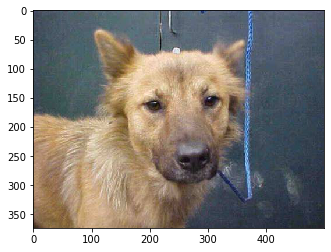

In [12]:
# plot first few images
import skimage
from skimage import io
image=[]

for i in range(idog):
	filename=folder_dog_train+dog_num[i]
	image.append(skimage.io.imread(filename))

plt.imshow(image[2])

In [0]:
image_cat=[]

for i in range(icat):
	filename_cat=folder_cat_train+cat_num[i]
	image_cat.append(skimage.io.imread(filename_cat))


## Transfer learning

In [14]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# Helper functions:
def plotSumm(history):
  history_dict = history.history
  history_dict.keys()
  print(history.history)
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc)+1)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='train')
    plt.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.savefig('Primer modelo-plot.png')
    plt.close()

## Model 1: 
VGG16 + 512/1 

In [0]:

def define_model():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(512, activation='relu', kernel_initializer='he_uniform')(flat1)
      output = Dense(1, activation='sigmoid')(class1) 
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model


In [23]:
model = define_model()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
75/75 [==============================] - 90s 1s/step - loss: 0.8721 - acc: 0.5363 - val_loss: 0.6878 - val_acc: 0.5094
Epoch 2/10
75/75 [==============================] - 88s 1s/step - loss: 0.6802 - acc: 0.5750 - val_loss: 0.6742 - val_acc: 0.5444
Epoch 3/10
75/75 [==============================] - 89s 1s/step - loss: 0.6222 - acc: 0.6325 - val_loss: 0.5788 - val_acc: 0.7106
Epoch 4/10
75/75 [==============================] - 89s 1s/step - loss: 0.3469 - acc: 0.8440 - val_loss: 0.3386 - val_acc: 0.8419
Epoch 5/10
75/75 [==============================] - 89s 1s/step - loss: 0.1329 - acc: 0.9452 - val_loss: 0.1044 - val_acc: 0.9650
Epoch 6/10
75/75 [==============================] - 88s 1s/step - loss: 0.0643 - acc: 0.9760 - val_loss: 0.1062 - val_acc: 0.9675
Epoch 7/10
75/75 [==============================] - 88s 1s/step - loss: 0.0286 - acc: 0.9910 -

In [0]:
summarize_diagnostics(history)


{'val_loss': [0.6878404116630554, 0.6741729998588561, 0.5788121223449707, 0.33859180331230165, 0.1043682113289833, 0.10622499532997608, 0.10901278607547284, 0.11625871732831002, 0.1276897132769227, 0.11777968019247055], 'val_acc': [0.509375, 0.544375, 0.710625, 0.841875, 0.965, 0.9675, 0.964375, 0.9525, 0.968125, 0.97375], 'loss': [0.8721252195040385, 0.6801971244812012, 0.6222298725446065, 0.34687129000822703, 0.13285350129008294, 0.06433093090852102, 0.0285504380458345, 0.04858985907242944, 0.028012306322925725, 0.006452959198601699], 'acc': [0.53625, 0.575, 0.6325, 0.8439583333333334, 0.9452083333333333, 0.9760416666666667, 0.9910416666666667, 0.9804166666666667, 0.9897916666666666, 0.9985416666666667]}


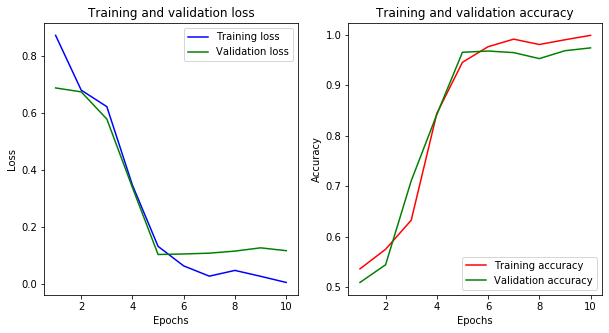

In [25]:
plotSumm(history)

In [0]:
## Ahora realiza modificaciones en el modelo para observar los cambios en el resultado
# Recomendación: Cambia el valor de los hiper parámetros.

